In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 89% 145M/163M [00:01<00:00, 102MB/s]
100% 163M/163M [00:01<00:00, 117MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np      
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg                        #for visualizing images
import cv2                                              #for image prcessing
from google.colab.patches import cv2_imshow             #to view images in a seperate window
from PIL import Image                                   #for image processing
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2653.jpg', 'with_mask_410.jpg', 'with_mask_233.jpg', 'with_mask_1526.jpg', 'with_mask_1999.jpg']
['with_mask_663.jpg', 'with_mask_3410.jpg', 'with_mask_1040.jpg', 'with_mask_3452.jpg', 'with_mask_1160.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3471.jpg', 'without_mask_3288.jpg', 'without_mask_2357.jpg', 'without_mask_757.jpg', 'without_mask_1876.jpg']
['without_mask_3138.jpg', 'without_mask_2422.jpg', 'without_mask_3245.jpg', 'without_mask_2223.jpg', 'without_mask_2331.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two classes of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

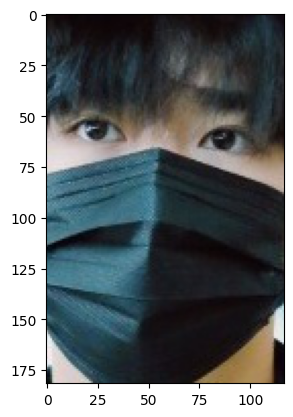

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1526.jpg')  #reads the image
imgplot = plt.imshow(img)
plt.show()

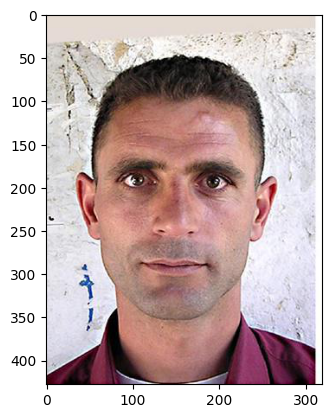

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1263.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays to get the pixel values

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[155, 165, 177],
        [154, 164, 176],
        [154, 164, 176],
        ...,
        [144, 156, 170],
        [146, 158, 172],
        [145, 157, 172]],

       [[154, 164, 176],
        [154, 164, 176],
        [153, 163, 175],
        ...,
        [144, 156, 170],
        [145, 157, 171],
        [145, 157, 172]],

       [[153, 163, 175],
        [153, 163, 175],
        [152, 162, 174],
        ...,
        [143, 155, 169],
        [144, 156, 170],
        [144, 156, 172]],

       ...,

       [[ 45,  48,  55],
        [ 35,  38,  45],
        [ 24,  27,  34],
        ...,
        [ 86,  89,  96],
        [ 86,  89,  96],
        [ 88,  91,  97]],

       [[ 24,  26,  33],
        [ 19,  22,  29],
        [ 18,  21,  28],
        ...,
        [ 78,  81,  88],
        [ 86,  89,  96],
        [ 86,  89,  95]],

       [[ 24,  29,  36],
        [ 22,  27,  35],
        [ 22,  27,  35],
        ...,
        [ 68,  71,  78],
        [ 84,  87,  94],
        [ 84,  87,  93]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape    #output: (height, width, no. of colour channels[RGB])

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 30,  27,  20],
        [ 32,  29,  22],
        [ 35,  32,  25],
        ...,
        [ 34,  20,   9],
        [ 32,  19,   8],
        [ 31,  19,   7]],

       [[ 27,  24,  17],
        [ 29,  26,  19],
        [ 35,  32,  25],
        ...,
        [ 32,  18,   8],
        [ 30,  17,   7],
        [ 29,  16,   6]],

       [[ 23,  20,  13],
        [ 26,  23,  16],
        [ 34,  31,  24],
        ...,
        [ 28,  15,   6],
        [ 27,  14,   5],
        [ 26,  13,   4]],

       ...,

       [[ 91,  75,  57],
        [ 95,  76,  57],
        [101,  77,  58],
        ...,
        [ 32,  29,  22],
        [ 31,  28,  23],
        [ 31,  28,  23]],

       [[ 79,  64,  47],
        [ 91,  73,  56],
        [115,  93,  73],
        ...,
        [ 31,  29,  23],
        [ 30,  28,  24],
        [ 30,  28,  24]],

       [[ 60,  45,  29],
        [ 83,  66,  51],
        [130, 109,  91],
        ...,
        [ 29,  28,  23],
        [ 30,  29,  24],
        [ 30,  29,  24]]

In [ ]:
X_train_scaled[0]

array([[[0.11764706, 0.10588235, 0.07843137],
        [0.1254902 , 0.11372549, 0.08627451],
        [0.1372549 , 0.1254902 , 0.09803922],
        ...,
        [0.13333333, 0.07843137, 0.03529412],
        [0.1254902 , 0.0745098 , 0.03137255],
        [0.12156863, 0.0745098 , 0.02745098]],

       [[0.10588235, 0.09411765, 0.06666667],
        [0.11372549, 0.10196078, 0.0745098 ],
        [0.1372549 , 0.1254902 , 0.09803922],
        ...,
        [0.1254902 , 0.07058824, 0.03137255],
        [0.11764706, 0.06666667, 0.02745098],
        [0.11372549, 0.0627451 , 0.02352941]],

       [[0.09019608, 0.07843137, 0.05098039],
        [0.10196078, 0.09019608, 0.0627451 ],
        [0.13333333, 0.12156863, 0.09411765],
        ...,
        [0.10980392, 0.05882353, 0.02352941],
        [0.10588235, 0.05490196, 0.01960784],
        [0.10196078, 0.05098039, 0.01568627]],

       ...,

       [[0.35686275, 0.29411765, 0.22352941],
        [0.37254902, 0.29803922, 0.22352941],
        [0.39607843, 0

**Building a Convolutional Neural Network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2  #with and without mask

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) #32 filters
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))   #No.of neurons = no. of classes

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 163s 947ms/step - loss: 0.4830 - acc: 0.7885 - val_loss: 0.2583 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 164s 964ms/step - loss: 0.2999 - acc: 0.8852 - val_loss: 0.2365 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 172s 1s/step - loss: 0.2446 - acc: 0.9020 - val_loss: 0.2111 - val_acc: 0.9074
Epoch 4/5
170/170 [==============================] - 173s 1s/step - loss: 0.2078 - acc: 0.9158 - val_loss: 0.2568 - val_acc: 0.8860
Epoch 5/5
170/170 [==============================] - 167s 981ms/step - loss: 0.1942 - acc: 0.9253 - val_loss: 0.1877 - val_acc: 0.9240


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 13s 274ms/step - loss: 0.2111 - acc: 0.9232
Test Accuracy = 0.9232296347618103


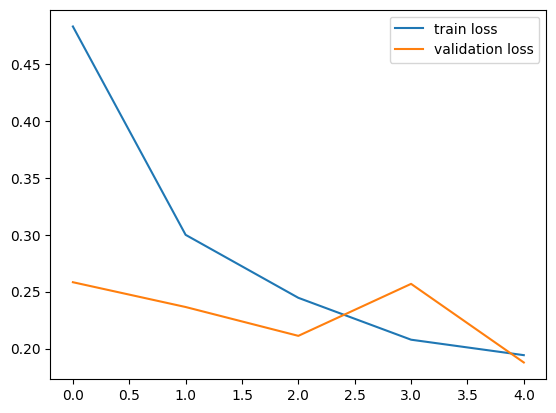

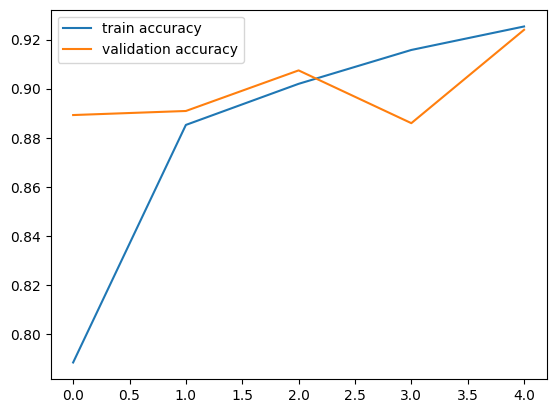

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/mask2.jpg


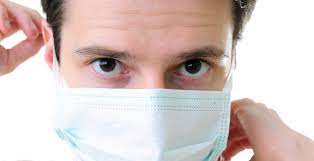

1/1 [==============================] - 0s 147ms/step
[[0.4682433  0.60240424]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')